In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_excel('Main.xlsx')

In [60]:
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [62]:
df.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,7.678103e+06,1.075194e+06,3.459586e+07,20.101981,3.483161
std,1.133721e+07,1.399289e+06,4.445234e+07,5.762072,1.661141
min,8.337000e+03,1.482000e+03,6.447300e+04,11.176535,1.454525
25%,3.098615e+05,5.948800e+04,1.421136e+06,16.076337,2.333452
50%,3.378518e+06,5.253010e+05,1.678794e+07,19.405567,3.073549
75%,1.036886e+07,1.596484e+06,6.076749e+07,24.170387,4.106503
max,5.422576e+07,5.741485e+06,1.998123e+08,33.460356,8.648065


In [63]:
df.isnull().sum()

Area Name                      0
Illiterate                     0
Graduate & above               0
Total - Population             0
Percentage Illiterate          0
Percentage Graduate & above    0
dtype: int64

<AxesSubplot:xlabel='Percentage Graduate & above'>

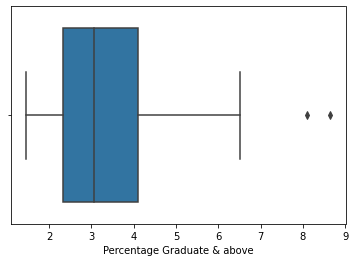

In [64]:
sns.boxplot(df['Percentage Graduate & above'])

In [65]:
grouped_df=df[['Illiterate','Graduate & above']]

In [66]:
grouped_df.head()

,Illiterate,Graduate & above
0,3378518,385463
1,963742,267936
2,4886265,979525
3,175200,91276
4,1929236,525301


In [67]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [70]:
scaled = scalar.fit_transform(grouped_df)
scaled.shape
scaled_df = pd.DataFrame(scaled)
# grouped_df.reset_index()
scaled_df.columns = ['Illiterate','Graduate & above']

In [72]:
scaled_df

,Illiterate,Graduate & above
0,-0.384782,-0.500111
1,-0.600888,-0.585328
2,-0.249850,-0.069368
3,-0.671456,-0.713421
4,-0.514483,-0.398717
5,-0.234701,0.040217
6,-0.436459,0.207167
7,0.964174,0.547952
8,4.165684,3.383443
9,2.430085,0.318281


In [73]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [74]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(scaled_df)

0.8905968423451257

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0], dtype=int32)

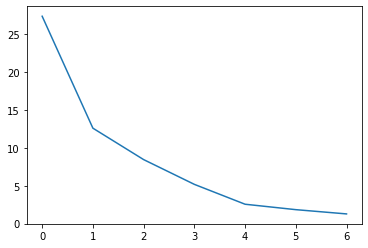

In [81]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [80]:
ssd

[27.32878843522272,
 12.57676387307738,
 8.436418340120643,
 5.172462659885679,
 2.553523134116675,
 1.8388144550135128,
 1.2773319216511037]

In [85]:
# silhouette analysis

from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6406227204976573
For n_clusters=3, the silhouette score is 0.6468193024547649
For n_clusters=4, the silhouette score is 0.6190826406017081
For n_clusters=5, the silhouette score is 0.5935825366104822
For n_clusters=6, the silhouette score is 0.6116830796283876
For n_clusters=7, the silhouette score is 0.5971141562379768
For n_clusters=8, the silhouette score is 0.604111908202853


### In graph we can see, at k=3, the graph which decreasing at a very high rate, starts to drop slowly.
As well as using Sihouette score we can see that k=2 and k=3 has almost same score.
So out of common point, we will take k=3 to calculate further

In [89]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_df)
scaled_df['cluster_id'] = kmeans.labels_
scaled_df.head()

# Since we selected 3 clusters, all cluster id will be between 0 and 2

,Illiterate,Graduate & above,cluster_id
0,-0.384782,-0.500111,1
1,-0.600888,-0.585328,1
2,-0.249850,-0.069368,1
3,-0.671456,-0.713421,1
4,-0.514483,-0.398717,1


<AxesSubplot:xlabel='cluster_id', ylabel='Illiterate'>

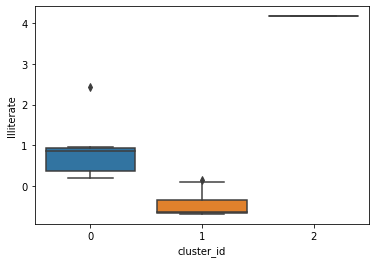

In [91]:
sns.boxplot(x='cluster_id', y='Illiterate', data=scaled_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Graduate & above'>

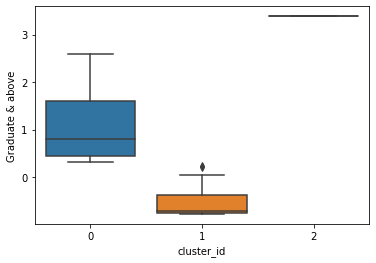

In [92]:
sns.boxplot(x='cluster_id', y='Graduate & above', data=scaled_df)